In [192]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt 
from random import shuffle
import math


导入数据

In [193]:
boston = load_boston()
data_var=np.array(boston.data)
data_target=np.array(boston.target)
y=data_target.reshape(len(data_target),1)
x=data_var

查看数据完整性

In [196]:
pd.DataFrame(data_var).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


取合适的μ值是关键，之前做了很多次取μ为1都是做出来都不收敛，经过查资料后发现μ取max_eig的倒数时效果比较好。

▽f（βt）在这里是关于X的导数。（其他地方不一定）



In [4]:
eig, _ = np.linalg.eig(x.T @ x)
max_eig = np.real(eig[0])
print(max_eig)
t = 1/max_eig


158386795.652915


构建迭代函数


In [5]:
def pg(lambd,beta):
  betafinal=copy.deepcopy(beta.reshape(len(beta),1))
  test= t * 2 * (x.T @ y - x.T @ x @ betafinal )
  beta_hat=betafinal+test
  beta_hat=beta_hat.reshape(13)
  tmp1=1-lambd*t/abs(beta_hat)
  for j in range(len(beta_hat)):
    if (tmp1>0)[j]:
      betafinal[j]=tmp1[j]*beta_hat[j]
    else:
      betafinal[j]=0
  return betafinal.flatten()

初始β取了随机生成，没有用ones

In [9]:
lambds=[]
for i in range(61):
  lambds.append(math.pow(10,-3-0.1*i))

五折交叉验证并画图

In [ ]:
ddddd=[]
lambd_result=[]
i=0
for lambd in lambds:
  

  shuffle(x)
  result=[]
  #五折交叉验证
  for i in range(5):
    i+=1
    err=1
    
    beta=np.random.random((13,1))
    tmp=[]
    
    train=copy.deepcopy(x)  
    del_item=[]
    for m in range(101):
      del_item.append(m+101*i)
    train_y=np.delete(y,del_item,axis=0)
    train=np.delete(train,del_item,axis=0)
    print(len(train))
    while err>1e-5:
        # if i ==1:
        #   print(err)
        tmp=pg(train,train_y,lambd,beta)
        #利用绝对收敛标准 
        err = np.sum(np.square(tmp.flatten() - beta.flatten()))
        beta = copy.deepcopy(tmp)

    result.append(np.sqrt(np.sum(np.square(train[i*101:(i+1)*101] @ beta - y[i*101:(i+1)*101] ))))
  lambd_result.append(np.mean(result))

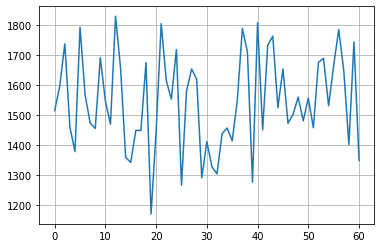

In [176]:
plt.plot(lambd_result)
plt.grid()

取最优的λ，用所有数据进行训练，并查看各个β值

In [ ]:
lambd=lambds[18]
beta=np.random.random((13,1))
err=1
tmp=[]
while err>1e-5:
    print(err)
    tmp=pg(lambd,beta)
    #利用绝对收敛标准 
    err = np.sum(np.square(tmp.flatten() - beta.flatten()))
    beta = copy.deepcopy(tmp)

查看β值并画图

In [7]:
beta

array([-9.14126252e-02,  5.12141011e-02, -6.63159925e-05,  6.66066478e-01,
        1.42164019e-01,  5.55493091e+00, -1.32736585e-03, -8.61216755e-01,
        1.77638952e-01, -1.17744233e-02, -3.55861845e-01,  1.44257953e-02,
       -4.57969653e-01])

x轴上越高代表影响正面因素越大，反之亦然

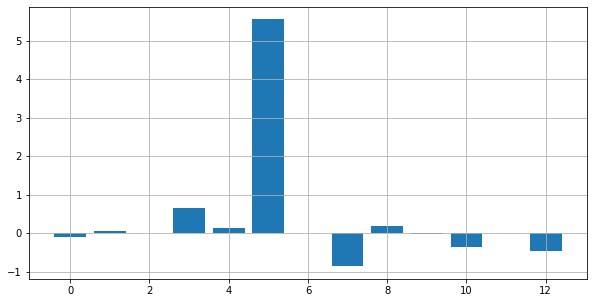

In [8]:
plt.figure(figsize=(10,5))
plt.bar(range(len(beta)),beta)
plt.grid()